Bankruptcy Prediction Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
#url = "https://raw.githubusercontent.com/adam-datasci/RiskAnalytics/main/Data/american_bankruptcy.csv?"
url = "Data/american_bankruptcy_normalized.csv"
df = pd.read_csv(url)

In [15]:
features = ['wc_to_ta_pct','re_to_ta_pct','ebit_to_ta_pct','mv_to_tl_pct','default']

In [16]:
default_periods = df[df['default'] == 1]
non_default_periods = df[df['default'] == 0]
random_sample = non_default_periods.sample(n=609, random_state=1)
df_balanced = pd.concat([default_periods, random_sample])
df_balanced_features = df_balanced[features]
df_balanced_features_melt = df_balanced_features.melt(id_vars='default', value_vars=features[:-1],var_name='ratio_name',value_name='ratio_value')

<Axes: xlabel='ratio_name', ylabel='ratio_value'>

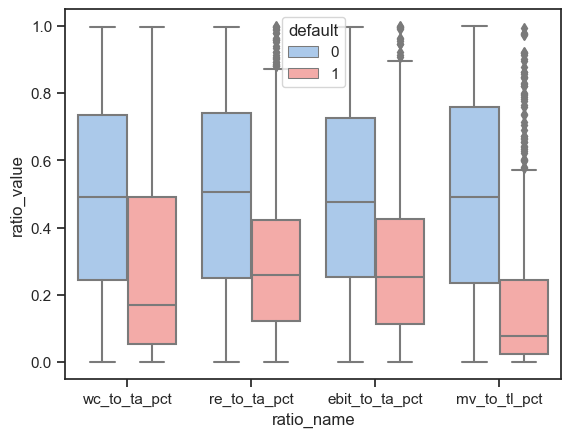

In [20]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='ratio_name', y='ratio_value', hue='default', data=df_balanced_features_melt, palette=["b", "r"])

In [ ]:
sns.pairplot(df_balanced_features,hue='default')

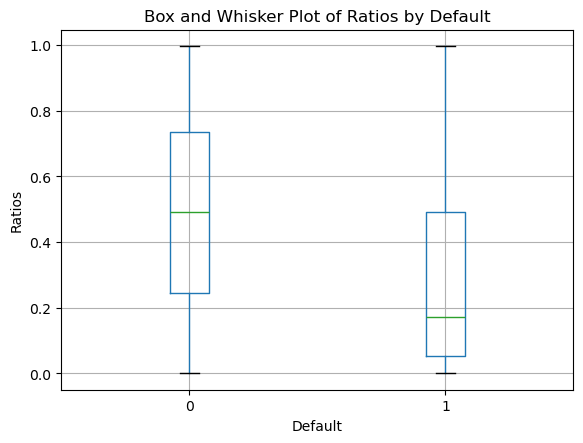

In [8]:
sns.boxplot

In [ ]:
default_periods.describe().loc[['50%','75%']]
default_periods.describe()


In [ ]:
non_default_periods.describe().loc[['50%','75%']]

In [ ]:
x_train.head(5)

In [ ]:
model = sm.Logit(y_train, x_train)
result = model.fit()

In [ ]:
predictions = result.predict(x_train)
predicted_classes = (predictions > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_train, predicted_classes)
conf_matrix = confusion_matrix(y_train, predicted_classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
result.summary()